In [9]:
import os
import tweepy as tw
import pandas as pd
from tqdm import tqdm
import string

import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from bs4 import BeautifulSoup

import bert
import tensorflow_hub as hub

import nltk
nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

# spaCy based imports
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.sklearn
import warnings
warnings.filterwarnings('ignore')

get_ipython().run_line_magic('matplotlib', 'inline')

# Plotly based imports for visualization
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.cluster import KMeans

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
classifier("I am so happy to use huggingface today!")[0]['label']

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


'POSITIVE'

In [11]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
#https://www.sakshi.com/election-2019/en/results/andhra_pradesh/district/prakasam
search_words = ['ChandrababuNaidu', 'JaganReddy', 'YS Jaganmohan Reddy','YSR Congress Party', 'YSRCP', 'YCP','YS_Jagan_Mohan_Reddy',
                'Telugu Desam Party', 'TDP', 'Chandrababu Naidu',
                'TJR Sudhakar Babu', 'Dr M. Venkaiah', 'Bachhana Chenchu Garataiah', 'Daggubati Venkateswara Rao', 'Dr Adimulapu Suresh', 'Maddisetti Venu Gopal',
                'Manugunta Maheedhar Reddy', 'KP Nagarjuna Reddy', 'Burra Madhu Sudhan Yadav', 'Balineni Srinivasa Reddy', 'Anna Venkata Rambabu', 'Amanchi Krishna Mohan',
                'B. Vijay Kumar', 'GBV Swamy', 'Gottipati Ravi Kumar', 'Eluri Sambasiva Rao', 'Budhala Ajita Rao', 'Kadiri Babu Rao','Pothula Ramarao',
                'Kandula Narayana Reddy', 'Mukku Ugra Narasimha Reddy', 'Damacharla Janardhan', 'Ashok Reddy', 'Karanam Balarama krishna Murthy'
               ]

### Twitter API Key Authorizations

In [13]:
# https://developer.twitter.com/en/portal/apps/20532982/keys

consumer_key= 'fs9OcCfrJiSWqvk3nqFVGSTM1' # API Key
consumer_secret= '0LpueXoQM3kf2TwiEgJy3jFWp94sDN0BG5xZz5IGyq1uP5xxGx' # API Key Secret
access_token= '945409158-2UAcGn6l6vkw6Q8RTTKIIGYwAXoMwo3mz44UHAYE'
access_token_secret= 'kZl63uZNp7ck0JQfOi7lmWznvobkw9jMMJIRd4JdC6SMd'

date_since = "2018-01-01"

In [19]:
nlp = spacy.load("en")

nlp.Defaults.stop_words |= stopwords_m

# Parser for reviews
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords.extend(stopwords_m)
parser = English()

NameError: ignored

In [20]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Twitter Data Collection

In [21]:
df_tweets = pd.DataFrame(columns=['user', 'date', 'location', 'tweet', 'mentions'])
for i in search_words:
    new_search = i + "-filter:retweets"
    print(i)
    tweet_in = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items()
    for tweet in tweet_in:
        df_tweets = df_tweets.append({'user': tweet.user.screen_name,
                                      'date': tweet.created_at,
                                      'location' : tweet.user.location,
                                      'tweet': tweet.text,
                                      'mentions': i}, 
                                      ignore_index = True)

df_tweets.head()

ChandrababuNaidu
JaganReddy
YS Jaganmohan Reddy
YSR Congress Party
YSRCP
YCP
YS_Jagan_Mohan_Reddy
Telugu Desam Party
TDP
Chandrababu Naidu
TJR Sudhakar Babu
Dr M. Venkaiah
Bachhana Chenchu Garataiah
Daggubati Venkateswara Rao
Dr Adimulapu Suresh
Maddisetti Venu Gopal
Manugunta Maheedhar Reddy
KP Nagarjuna Reddy
Burra Madhu Sudhan Yadav
Balineni Srinivasa Reddy
Anna Venkata Rambabu
Amanchi Krishna Mohan
B. Vijay Kumar
GBV Swamy
Gottipati Ravi Kumar
Eluri Sambasiva Rao
Budhala Ajita Rao
Kadiri Babu Rao
Pothula Ramarao
Kandula Narayana Reddy
Mukku Ugra Narasimha Reddy
Damacharla Janardhan
Ashok Reddy
Karanam Balarama krishna Murthy


user                date          location  \
0       SakshiPost 2021-09-16 03:07:17  Hyderabad, India   
1     NewsMeter_In 2021-09-15 03:26:01                     
2        123telugu 2021-09-14 01:35:02         Hyderabad   
3  TheHansIndiaWeb 2021-09-13 21:07:49         Hyderabad   
4      Nagaraju_iD 2021-09-13 05:57:01                     

                                               tweet          mentions  
0  Chandrababu Fighting For Farmer's Welfare a Jo...  ChandrababuNaidu  
1  Dharmana slams Naidu for 'shedding crocodile t...  ChandrababuNaidu  
2  #ChandrababuNaidu enquires #Chiranjeevi about ...  ChandrababuNaidu  
3  State govt held responsible for rising debts o...  ChandrababuNaidu  
4  #TDP Ex MLA #VaradaRajuluReddy Exclusive Inter...  ChandrababuNaidu

In [22]:
df_tweets.shape

(3720, 5)

In [23]:
unique_text = df_tweets.tweet.unique()
print(len(unique_text))

3466


In [24]:
tweet_grp = {'YSRCP': ['ChandrababuNaidu', 'JaganReddy', 'YS Jaganmohan Reddy','YSR Congress Party', 'YSRCP', 'YCP','YS_Jagan_Mohan_Reddy',
                       'jagan mohan reddy andra cm', 'ysjagan', 'YS_Jagan_Mohan_Reddy', 'CM Jagan Mohan Reddy',
                       'TJR Sudhakar Babu', 'Dr M. Venkaiah', 'Bachhana Chenchu Garataiah', 'Daggubati Venkateswara Rao', 'Dr Adimulapu Suresh', 'Maddisetti Venu Gopal',
                'Manugunta Maheedhar Reddy', 'KP Nagarjuna Reddy', 'Burra Madhu Sudhan Yadav', 'Balineni Srinivasa Reddy', 'Anna Venkata Rambabu', 'Amanchi Krishna Mohan'],
                'TDP_JSP': ['Telugu Desam Party', 'TDP', 'Chandrababu Naidu', 'ChandrababuNaidu', 'B. Vijay Kumar', 'GBV Swamy', 'Gottipati Ravi Kumar', 'Eluri Sambasiva Rao', 'Budhala Ajita Rao', 'Kadiri Babu Rao','Pothula Ramarao',
                'Kandula Narayana Reddy', 'Mukku Ugra Narasimha Reddy', 'Damacharla Janardhan', 'Ashok Reddy', 'Karanam Balarama krishna Murthy']
            }
df_tweets['tweet_src'] = df_tweets.mentions.map({item: k for k, v in tweet_grp.items() for item in v})

Text(0.5, 1.0, 'Twitter Source Analysis')

Text(0.5, 0, 'Source Category')

Text(0, 0.5, 'Frequency')

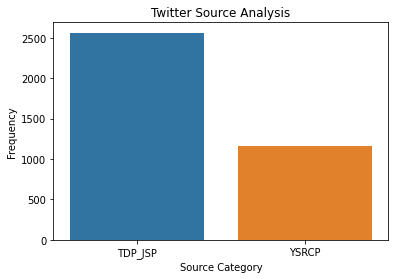

In [25]:
sns.countplot(x='tweet_src', data=df_tweets)
#plt.bar(df_tweets['tweet_src'].value_counts().index, df_tweets['tweet_src'].value_counts().values)

plt.title('Twitter Source Analysis')
plt.xlabel('Source Category')
plt.ylabel('Frequency')


plt.show()

### Data Preprocessing

In [26]:
def preprocess_text(sen):
    #Remove urls and @mentions
    sentence = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", sen)
    
    # Removing html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    sentence = remove_tags(sentence)
    
    #create an object of class PorterStemmer
    porter = PorterStemmer()
    lancaster = LancasterStemmer()
    
    #sentence = lancaster.stem(sentence)

    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

# Function to remove tags
def remove_tags(html):
    soup = BeautifulSoup(html, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

def tokenize_messages(text_messages):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_messages))


def sterilization(data):
    
    data = re.sub('https?://\S+|www\.\S+', '', data)
    data = re.sub('<.*?>', '', data)
    emoj = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    emoj.sub(r'', data)
    data = data.lower()
    data = data.translate(str.maketrans('','', string.punctuation))
    data = re.sub(r'\[.*?\]', '', data)
    data = re.sub(r'\w*\d\w*','', data)
    

    return data

def wordcloud(cluster):
  # combining the image with the dataset
  Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

  # We use the ImageColorGenerator library from Wordcloud 
  # Here we take the color of the image and impose it over our wordcloud
  image_colors = ImageColorGenerator(Mask)

  # Now we use the WordCloud function from the wordcloud library 
  wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cluster)

  # Size of the image generated 
  plt.figure(figsize=(10,20))

  # Here we recolor the words from the dataset to the image's color
  # recolor just recolors the default colors to the image's blue color
  # interpolation is used to smooth the image generated 
  plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

  plt.axis('off')
  plt.show()

def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
   
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, df, generate_missing=False):
    embeddings = df['clean_tweet'].apply(lambda x: get_average_word2vec(x, vectors, generate_missing=generate_missing))
    return list(embeddings)

def wordcloud_clustering(word_vectors):
    num_clusters = 2
    km = KMeans(n_clusters=num_clusters)
    km.fit(word_vectors)
    clusters = km.labels_.tolist()
    
    tweets = {'Tweet': df_tweets["clean_tweet"].tolist(), 'Cluster': clusters}
    frame = pd.DataFrame(tweets, index = [clusters])
    
    print('Value Counts for two clusters: \n', frame['Cluster'].value_counts())
    
    cluster_0=frame[frame['Cluster'] == 0]
    cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])
    wordcloud(cluster_0_words)
    
    cluster_1=frame[frame['Cluster'] == 1]
    cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])
    wordcloud(cluster_1_words)
    
# create fuction to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    
    score = int(float(score))
    if score < 0:
        return 'negative'
    elif score ==0:
        return 'neutral'
    else:
        return 'positive'

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
    
NUM_TOPICS = 5

In [27]:
clean_tweet = []
for sen in df_tweets['tweet']:
    clean_tweet.append(preprocess_text(sen))
    
df_tweets['clean_tweet'] = clean_tweet
df_tweets.head()

user                date          location  \
0       SakshiPost 2021-09-16 03:07:17  Hyderabad, India   
1     NewsMeter_In 2021-09-15 03:26:01                     
2        123telugu 2021-09-14 01:35:02         Hyderabad   
3  TheHansIndiaWeb 2021-09-13 21:07:49         Hyderabad   
4      Nagaraju_iD 2021-09-13 05:57:01                     

                                               tweet          mentions  \
0  Chandrababu Fighting For Farmer's Welfare a Jo...  ChandrababuNaidu   
1  Dharmana slams Naidu for 'shedding crocodile t...  ChandrababuNaidu   
2  #ChandrababuNaidu enquires #Chiranjeevi about ...  ChandrababuNaidu   
3  State govt held responsible for rising debts o...  ChandrababuNaidu   
4  #TDP Ex MLA #VaradaRajuluReddy Exclusive Inter...  ChandrababuNaidu   

  tweet_src                                        clean_tweet  
0   TDP_JSP  Chandrababu Fighting For Farmer Welfare Joke Y...  
1   TDP_JSP  Dharmana slams Naidu for shedding crocodile te...  
2   TDP_JSP  ChandrababuNaidu enquires Chiranjeevi about Sa...  
3   TDP_JSP  State govt held responsible for rising debts o...  
4   TDP_JSP  TDP Ex MLA VaradaRajuluReddy Exclusive Intervi...

In [28]:
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(lambda x : sterilization(x))
df_tweets.head()

user                date          location  \
0       SakshiPost 2021-09-16 03:07:17  Hyderabad, India   
1     NewsMeter_In 2021-09-15 03:26:01                     
2        123telugu 2021-09-14 01:35:02         Hyderabad   
3  TheHansIndiaWeb 2021-09-13 21:07:49         Hyderabad   
4      Nagaraju_iD 2021-09-13 05:57:01                     

                                               tweet          mentions  \
0  Chandrababu Fighting For Farmer's Welfare a Jo...  ChandrababuNaidu   
1  Dharmana slams Naidu for 'shedding crocodile t...  ChandrababuNaidu   
2  #ChandrababuNaidu enquires #Chiranjeevi about ...  ChandrababuNaidu   
3  State govt held responsible for rising debts o...  ChandrababuNaidu   
4  #TDP Ex MLA #VaradaRajuluReddy Exclusive Inter...  ChandrababuNaidu   

  tweet_src                                        clean_tweet  
0   TDP_JSP  chandrababu fighting for farmer welfare joke y...  
1   TDP_JSP  dharmana slams naidu for shedding crocodile te...  
2   TDP_JSP  chandrababunaidu enquires chiranjeevi about sa...  
3   TDP_JSP  state govt held responsible for rising debts o...  
4   TDP_JSP  tdp ex mla varadarajulureddy exclusive intervi...

In [29]:
df_tweets['clean_tweet'] = np.vectorize(remove_pattern)(df_tweets['clean_tweet'], "@[\w]*")
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df_tweets.head()

user                date          location  \
0       SakshiPost 2021-09-16 03:07:17  Hyderabad, India   
1     NewsMeter_In 2021-09-15 03:26:01                     
2        123telugu 2021-09-14 01:35:02         Hyderabad   
3  TheHansIndiaWeb 2021-09-13 21:07:49         Hyderabad   
4      Nagaraju_iD 2021-09-13 05:57:01                     

                                               tweet          mentions  \
0  Chandrababu Fighting For Farmer's Welfare a Jo...  ChandrababuNaidu   
1  Dharmana slams Naidu for 'shedding crocodile t...  ChandrababuNaidu   
2  #ChandrababuNaidu enquires #Chiranjeevi about ...  ChandrababuNaidu   
3  State govt held responsible for rising debts o...  ChandrababuNaidu   
4  #TDP Ex MLA #VaradaRajuluReddy Exclusive Inter...  ChandrababuNaidu   

  tweet_src                                        clean_tweet  
0   TDP_JSP  chandrababu fighting for farmer welfare joke y...  
1   TDP_JSP  dharmana slams naidu for shedding crocodile te...  
2   TDP_JSP  chandrababunaidu enquires chiranjeevi about sa...  
3   TDP_JSP  state govt held responsible for rising debts f...  
4   TDP_JSP  tdp mla varadarajulureddy exclusive interview ...

In [30]:
tokenized_tweet = df_tweets['clean_tweet'].apply(lambda x: x.split())

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df_tweets['clean_tweet'] = tokenized_tweet
df_tweets.drop_duplicates(subset=['clean_tweet'], keep = 'first',inplace= True)
df_tweets.reset_index(drop=True,inplace=True)
df_tweets.head()

user                date          location  \
0       SakshiPost 2021-09-16 03:07:17  Hyderabad, India   
1     NewsMeter_In 2021-09-15 03:26:01                     
2        123telugu 2021-09-14 01:35:02         Hyderabad   
3  TheHansIndiaWeb 2021-09-13 21:07:49         Hyderabad   
4      Nagaraju_iD 2021-09-13 05:57:01                     

                                               tweet          mentions  \
0  Chandrababu Fighting For Farmer's Welfare a Jo...  ChandrababuNaidu   
1  Dharmana slams Naidu for 'shedding crocodile t...  ChandrababuNaidu   
2  #ChandrababuNaidu enquires #Chiranjeevi about ...  ChandrababuNaidu   
3  State govt held responsible for rising debts o...  ChandrababuNaidu   
4  #TDP Ex MLA #VaradaRajuluReddy Exclusive Inter...  ChandrababuNaidu   

  tweet_src                                        clean_tweet  
0   TDP_JSP  chandrababu fighting for farmer welfare joke y...  
1   TDP_JSP  dharmana slams naidu for shedding crocodile te...  
2   TDP_JSP  chandrababunaidu enquires chiranjeevi about sa...  
3   TDP_JSP  state govt held responsible for rising debts f...  
4   TDP_JSP  tdp mla varadarajulureddy exclusive interview ...

In [31]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_tweets["tokens"] = df_tweets['clean_tweet'].apply(tokenizer.tokenize)
df_tweets.head()

user                date          location  \
0       SakshiPost 2021-09-16 03:07:17  Hyderabad, India   
1     NewsMeter_In 2021-09-15 03:26:01                     
2        123telugu 2021-09-14 01:35:02         Hyderabad   
3  TheHansIndiaWeb 2021-09-13 21:07:49         Hyderabad   
4      Nagaraju_iD 2021-09-13 05:57:01                     

                                               tweet          mentions  \
0  Chandrababu Fighting For Farmer's Welfare a Jo...  ChandrababuNaidu   
1  Dharmana slams Naidu for 'shedding crocodile t...  ChandrababuNaidu   
2  #ChandrababuNaidu enquires #Chiranjeevi about ...  ChandrababuNaidu   
3  State govt held responsible for rising debts o...  ChandrababuNaidu   
4  #TDP Ex MLA #VaradaRajuluReddy Exclusive Inter...  ChandrababuNaidu   

  tweet_src                                        clean_tweet  \
0   TDP_JSP  chandrababu fighting for farmer welfare joke y...   
1   TDP_JSP  dharmana slams naidu for shedding crocodile te...   
2   TDP_JSP  chandrababunaidu enquires chiranjeevi about sa...   
3   TDP_JSP  state govt held responsible for rising debts f...   
4   TDP_JSP  tdp mla varadarajulureddy exclusive interview ...   

                                              tokens  
0  [chandrababu, fighting, for, farmer, welfare, ...  
1  [dharmana, slams, naidu, for, shedding, crocod...  
2  [chandrababunaidu, enquires, chiranjeevi, abou...  
3  [state, govt, held, responsible, for, rising, ...  
4  [tdp, mla, varadarajulureddy, exclusive, inter...

In [32]:
df_tweets['tokens_length'] = df_tweets['tokens'].apply(len)
df_tweets.head()

user                date          location  \
0       SakshiPost 2021-09-16 03:07:17  Hyderabad, India   
1     NewsMeter_In 2021-09-15 03:26:01                     
2        123telugu 2021-09-14 01:35:02         Hyderabad   
3  TheHansIndiaWeb 2021-09-13 21:07:49         Hyderabad   
4      Nagaraju_iD 2021-09-13 05:57:01                     

                                               tweet          mentions  \
0  Chandrababu Fighting For Farmer's Welfare a Jo...  ChandrababuNaidu   
1  Dharmana slams Naidu for 'shedding crocodile t...  ChandrababuNaidu   
2  #ChandrababuNaidu enquires #Chiranjeevi about ...  ChandrababuNaidu   
3  State govt held responsible for rising debts o...  ChandrababuNaidu   
4  #TDP Ex MLA #VaradaRajuluReddy Exclusive Inter...  ChandrababuNaidu   

  tweet_src                                        clean_tweet  \
0   TDP_JSP  chandrababu fighting for farmer welfare joke y...   
1   TDP_JSP  dharmana slams naidu for shedding crocodile te...   
2   TDP_JSP  chandrababunaidu enquires chiranjeevi about sa...   
3   TDP_JSP  state govt held responsible for rising debts f...   
4   TDP_JSP  tdp mla varadarajulureddy exclusive interview ...   

                                              tokens  tokens_length  
0  [chandrababu, fighting, for, farmer, welfare, ...             11  
1  [dharmana, slams, naidu, for, shedding, crocod...             12  
2  [chandrababunaidu, enquires, chiranjeevi, abou...              9  
3  [state, govt, held, responsible, for, rising, ...             13  
4  [tdp, mla, varadarajulureddy, exclusive, inter...              8

In [33]:
# drop zero length sentences

indexes = df_tweets[df_tweets['tokens_length']==0]['tokens'].index
df_tweets.drop(index = indexes,inplace=True)
df_tweets.reset_index(drop=True,inplace=True)

In [34]:
df_tweets.head()

user                date          location  \
0       SakshiPost 2021-09-16 03:07:17  Hyderabad, India   
1     NewsMeter_In 2021-09-15 03:26:01                     
2        123telugu 2021-09-14 01:35:02         Hyderabad   
3  TheHansIndiaWeb 2021-09-13 21:07:49         Hyderabad   
4      Nagaraju_iD 2021-09-13 05:57:01                     

                                               tweet          mentions  \
0  Chandrababu Fighting For Farmer's Welfare a Jo...  ChandrababuNaidu   
1  Dharmana slams Naidu for 'shedding crocodile t...  ChandrababuNaidu   
2  #ChandrababuNaidu enquires #Chiranjeevi about ...  ChandrababuNaidu   
3  State govt held responsible for rising debts o...  ChandrababuNaidu   
4  #TDP Ex MLA #VaradaRajuluReddy Exclusive Inter...  ChandrababuNaidu   

  tweet_src                                        clean_tweet  \
0   TDP_JSP  chandrababu fighting for farmer welfare joke y...   
1   TDP_JSP  dharmana slams naidu for shedding crocodile te...   
2   TDP_JSP  chandrababunaidu enquires chiranjeevi about sa...   
3   TDP_JSP  state govt held responsible for rising debts f...   
4   TDP_JSP  tdp mla varadarajulureddy exclusive interview ...   

                                              tokens  tokens_length  
0  [chandrababu, fighting, for, farmer, welfare, ...             11  
1  [dharmana, slams, naidu, for, shedding, crocod...             12  
2  [chandrababunaidu, enquires, chiranjeevi, abou...              9  
3  [state, govt, held, responsible, for, rising, ...             13  
4  [tdp, mla, varadarajulureddy, exclusive, inter...              8

In [35]:
df_tweets[df_tweets['tokens_length']==0]

df_tweets.reset_index(drop=True,inplace=True)
df_tweets.info()

Empty DataFrame
Columns: [user, date, location, tweet, mentions, tweet_src, clean_tweet, tokens, tokens_length]
Index: []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user           2949 non-null   object        
 1   date           2949 non-null   datetime64[ns]
 2   location       2949 non-null   object        
 3   tweet          2949 non-null   object        
 4   mentions       2949 non-null   object        
 5   tweet_src      2949 non-null   object        
 6   clean_tweet    2949 non-null   object        
 7   tokens         2949 non-null   object        
 8   tokens_length  2949 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 207.5+ KB


Text(0.5, 1.0, 'Twitter Source Analysis')

Text(0.5, 0, 'Source Category')

Text(0, 0.5, 'Frequency')

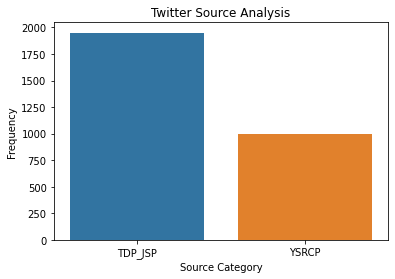

In [36]:
sns.countplot(x='tweet_src', data=df_tweets)
#plt.bar(df_tweets['tweet_src'].value_counts().index, df_tweets['tweet_src'].value_counts().values)

plt.title('Twitter Source Analysis')
plt.xlabel('Source Category')
plt.ylabel('Frequency')


plt.show()

In [37]:
df_tweets['month'] = df_tweets['date'].to_numpy().astype('datetime64[M]')
df_tweets.head()

user                date          location  \
0       SakshiPost 2021-09-16 03:07:17  Hyderabad, India   
1     NewsMeter_In 2021-09-15 03:26:01                     
2        123telugu 2021-09-14 01:35:02         Hyderabad   
3  TheHansIndiaWeb 2021-09-13 21:07:49         Hyderabad   
4      Nagaraju_iD 2021-09-13 05:57:01                     

                                               tweet          mentions  \
0  Chandrababu Fighting For Farmer's Welfare a Jo...  ChandrababuNaidu   
1  Dharmana slams Naidu for 'shedding crocodile t...  ChandrababuNaidu   
2  #ChandrababuNaidu enquires #Chiranjeevi about ...  ChandrababuNaidu   
3  State govt held responsible for rising debts o...  ChandrababuNaidu   
4  #TDP Ex MLA #VaradaRajuluReddy Exclusive Inter...  ChandrababuNaidu   

  tweet_src                                        clean_tweet  \
0   TDP_JSP  chandrababu fighting for farmer welfare joke y...   
1   TDP_JSP  dharmana slams naidu for shedding crocodile te...   
2   TDP_JSP  chandrababunaidu enquires chiranjeevi about sa...   
3   TDP_JSP  state govt held responsible for rising debts f...   
4   TDP_JSP  tdp mla varadarajulureddy exclusive interview ...   

                                              tokens  tokens_length      month  
0  [chandrababu, fighting, for, farmer, welfare, ...             11 2021-09-01  
1  [dharmana, slams, naidu, for, shedding, crocod...             12 2021-09-01  
2  [chandrababunaidu, enquires, chiranjeevi, abou...              9 2021-09-01  
3  [state, govt, held, responsible, for, rising, ...             13 2021-09-01  
4  [tdp, mla, varadarajulureddy, exclusive, inter...              8 2021-09-01

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Users Tweets')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

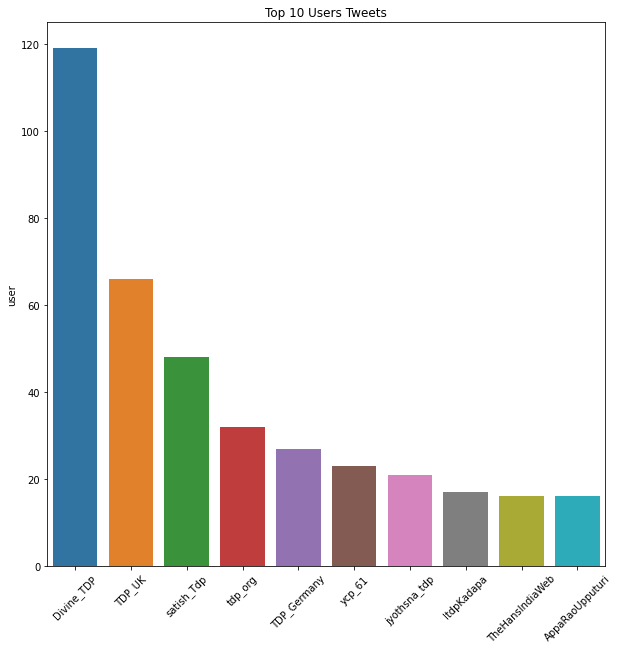

In [38]:
plt.figure(figsize=(10,10))

sns.barplot(x=df_tweets['user'].value_counts(sort=True, ascending=False).head(10).index, y=df_tweets['user'].value_counts(sort=True, ascending=False).head(10))

plt.title('Top 10 Users Tweets')
plt.xticks(rotation=45)
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Users Location Tweets')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

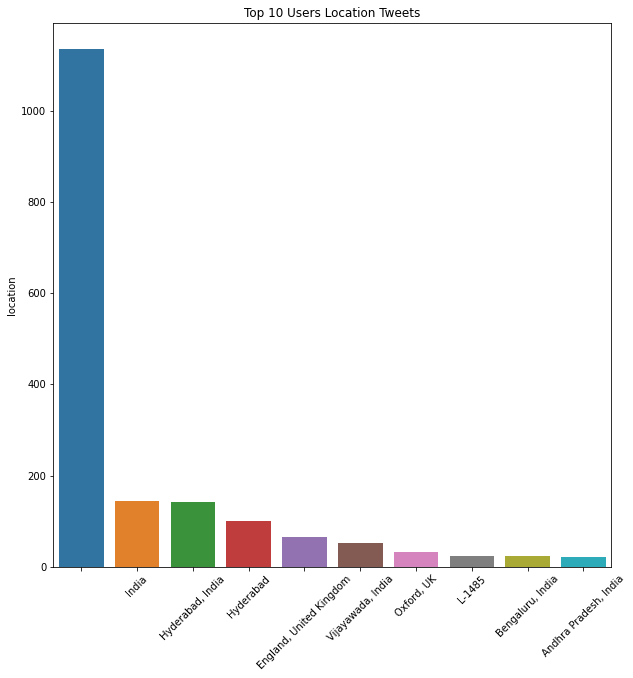

In [39]:
plt.figure(figsize=(10,10))

sns.barplot(x=df_tweets['location'].value_counts(sort=True, ascending=False).head(10).index, y=df_tweets['location'].value_counts(sort=True, ascending=False).head(10))

plt.title('Top 10 Users Location Tweets')
plt.xticks(rotation=45)
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Tweets Sources')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

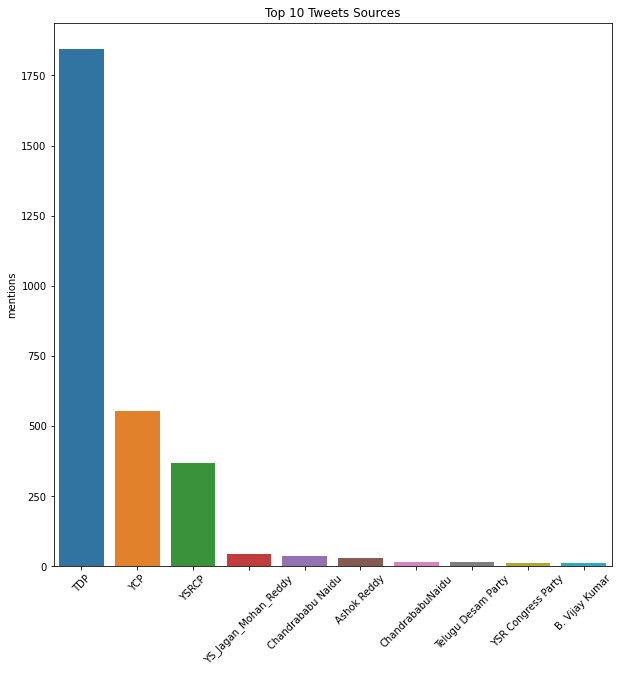

In [40]:
plt.figure(figsize=(10,10))

sns.barplot(x=df_tweets['mentions'].value_counts(sort=True, ascending=False).head(10).index, y=df_tweets['mentions'].value_counts(sort=True, ascending=False).head(10))

plt.title('Top 10 Tweets Sources')
plt.xticks(rotation=45)
plt.show()

## Vectorizer

In [41]:
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS.union(stopwords_m)

NameError: ignored

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = list(STOP_WORDS)
stopwords.extend(stopwords_m)

count_vect = CountVectorizer(analyzer='word',ngram_range=(1,1), stop_words=stopwords, min_df = 0.0001, max_df=0.7)
count_vect.fit(df_tweets['clean_tweet'])
desc_matrix = count_vect.transform(df_tweets["clean_tweet"])
desc_matrix

NameError: ignored

## Word2Vec Pretrained Model for Word Vectors

In [44]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

FileNotFoundError: ignored

In [45]:
embeddings = get_word2vec_embeddings(model, df_tweets)

NameError: ignored

## Clustering - TF-IDF Vectors

In [ ]:
wordcloud_clustering(desc_matrix)

## Clustering Word2Vec Embeddings

In [ ]:
wordcloud_clustering(embeddings)

## Sentiment Prediction Using TextBlob 

## YSRCP Tweets Sentiment Analysis

In [ ]:
YSRP_Tweets = df_tweets[df_tweets['tweet_src'] == 'YSRCP']
YSRP_Tweets = YSRP_Tweets[~YSRP_Tweets['mentions'].isin(['ysjagan'])]

YSRP_Tweets['subjectivity']= YSRP_Tweets['clean_tweet'].apply(getSubjectivity)
YSRP_Tweets['polarity']    = YSRP_Tweets['clean_tweet'].apply(getPolarity)
YSRP_Tweets['analysis']    = YSRP_Tweets['polarity'].apply(getAnalysis)
YSRP_Tweets.head()

In [ ]:
%%time
YSRP_Tweets.polarity = YSRP_Tweets.polarity.apply(lambda x: getAnalysis(x))

In [ ]:
from collections import Counter

target_cnt = Counter(YSRP_Tweets.polarity)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
general  = YSRP_Tweets.groupby('analysis').analysis.count()
neutral  = YSRP_Tweets[YSRP_Tweets['analysis'] == 'neutral'].clean_tweet.count()
positive = YSRP_Tweets[YSRP_Tweets['analysis'] == 'positive'].clean_tweet.count()
negative = YSRP_Tweets[YSRP_Tweets['analysis'] == 'negative'].clean_tweet.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["positivity","negativity","neutrality"], values = [positive,negative,neutral])])
fig.update_layout(title_text ='sentimat analysis tweets for YSRCP')
#fig.show()

In [ ]:
word_cloud(YSRP_Tweets['clean_tweet'][0:1000])

## TDP Tweets Sentiment Analysis

In [ ]:
TDP_Tweets = df_tweets[df_tweets['tweet_src'] == 'TDP_JSP']

TDP_Tweets['subjectivity']= TDP_Tweets['clean_tweet'].apply(getSubjectivity)
TDP_Tweets['polarity']    = TDP_Tweets['clean_tweet'].apply(getPolarity)
TDP_Tweets['analysis']    = TDP_Tweets['polarity'].apply(getAnalysis)
TDP_Tweets.head()

In [ ]:
%%time
TDP_Tweets.polarity = TDP_Tweets.polarity.apply(lambda x: getAnalysis(x))

In [ ]:
target_cnt = Counter(TDP_Tweets.polarity)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
general  = TDP_Tweets.groupby('analysis').analysis.count()
neutral  = TDP_Tweets[TDP_Tweets['analysis'] == 'neutral'].clean_tweet.count()
positive = TDP_Tweets[TDP_Tweets['analysis'] == 'positive'].clean_tweet.count()
negative = TDP_Tweets[TDP_Tweets['analysis'] == 'negative'].clean_tweet.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["positivity","negativity","neutrality"], values = [positive,negative,neutral])])
fig.update_layout(title_text ='sentimat analysis tweets for TDP')
#fig.show()

### Here we can see according to the sentiment analysis of tweets

### YSRCP got 0.607% Positive Tweets, 0.304% Negative Tweets

### TDP got 0.877% Positive Tweets, 0.292% Negative Tweets

### From Above analysis, we can conclude that TDP is having highest positive scores

## Sentiment Prediction Using Huggingface Transformer

## Sentiment Analysis Tweets for YSRCP

In [ ]:
YSRP_Tweets_bert = df_tweets[df_tweets['tweet_src'] == 'YSRCP']
YSRP_Tweets_bert = YSRP_Tweets_bert[~YSRP_Tweets_bert['mentions'].isin(['ysjagan'])]

YSRP_Tweets_bert['bert_based_sentiment'] = YSRP_Tweets_bert['clean_tweet'].apply(lambda x: classifier(x)[0]['label'].lower())
YSRP_Tweets_bert.head()

In [ ]:
target_cnt_bert = Counter(YSRP_Tweets_bert.bert_based_sentiment)

plt.figure(figsize=(16,8))
plt.bar(target_cnt_bert.keys(), target_cnt_bert.values())
plt.title("Dataset labels distribuition")


In [ ]:
general  = YSRP_Tweets_bert.groupby('bert_based_sentiment').bert_based_sentiment.count()

positive = YSRP_Tweets_bert[YSRP_Tweets_bert['bert_based_sentiment'] == 'positive'].clean_tweet.count()
negative = YSRP_Tweets_bert[YSRP_Tweets_bert['bert_based_sentiment'] == 'negative'].clean_tweet.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["positivity","negativity"], values = [positive,negative])])
fig.update_layout(title_text ='sentimat analysis tweets for YSRP')
#fig.show()

## Sentiment Analysis Tweets for TDP

In [ ]:
TDP_Tweets_bert = df_tweets[df_tweets['tweet_src'] == 'TDP_JSP']

TDP_Tweets_bert['bert_based_sentiment'] = TDP_Tweets_bert['clean_tweet'].apply(lambda x: classifier(x)[0]['label'].lower())
TDP_Tweets_bert.head()

In [ ]:
target_cnt_bert = Counter(TDP_Tweets_bert.bert_based_sentiment)

plt.figure(figsize=(16,8))
plt.bar(target_cnt_bert.keys(), target_cnt_bert.values())
plt.title("Dataset labels distribuition")

In [ ]:
general  = TDP_Tweets_bert.groupby('bert_based_sentiment').bert_based_sentiment.count()

positive = TDP_Tweets_bert[TDP_Tweets_bert['bert_based_sentiment'] == 'positive'].clean_tweet.count()
negative = TDP_Tweets_bert[TDP_Tweets_bert['bert_based_sentiment'] == 'negative'].clean_tweet.count()

fig = go.Figure(data = [go.Funnelarea(labels = ["positivity","negativity"], values = [positive,negative])])
fig.update_layout(title_text ='sentimat analysis tweets for YSRP')
#fig.show()

In [ ]:
#https://github.com/shahules786/Twitter-Sentiment
# https://neptune.ai/blog/document-classification-small-datasets
#https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair
#https://www.kaggle.com/kazanova/sentiment140/code?datasetId=2477

from twittersentiment import TwitterSentiment
mod = TwitterSentiment.Sentiment()
mod.load_pretrained()

In [ ]:
print(mod.model)

In [ ]:
res = mod.predict("negative")
print(res)

### LDA - Topic Modelling

In [ ]:
# Processing tweets
tqdm.pandas()
#tweets_df_p['tweets'] = df_tweets['clean_tweet'].progress_apply(spacy_tokenizer)

# Creating a vectorizer
# specify to only include those words that appear in less than 80% of the document and appear in at least 3 documents.
vectorizer = CountVectorizer(min_df=3, max_df=0.8, stop_words=stopwords, lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(df_tweets['clean_tweet'])

# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

topic_values = lda.transform(data_vectorized)
df_tweets['Topic_LDA'] = topic_values.argmax(axis=1)
df_tweets.to_csv('lda_comments.csv')

# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    topicv=[]
    score=[]
    res=[]
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        res =[(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        print(res)
        for i, j in res[:5]:
            topicv.append(i)
            score.append(j)
    return res, topicv, score

# Keywords for topics clustered by Latent Dirichlet Allocation
print("LDA Model:")
res, topicv, score = selected_topics(lda, vectorizer)
tweet_topic = pd.DataFrame(data={'Topic': topicv, 'Score': score})
res
tweet_topic = tweet_topic.groupby(['Topic'], as_index=False)['Topic', 'Score'].max('Score')

In [ ]:
tweet_topic


### Topic Modelling Visualization - Wordcloud

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(tweet_topic['Topic'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wc = wordcloud.generate(long_string)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Visualize the word cloud
#wordcloud.to_image()

### Topic Modelling Visualization - PyLDAvis

In [ ]:
#Visualizing LDA results with pyLDAvis 
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
dash

### BERT Tokenizer

In [ ]:
#This TF Hub model uses the implementation of BERT from the TensorFlow Models repository on GitHub at tensorflow/models/official/nlp/bert. It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads.
# This model has been pre-trained for English on the Wikipedia and BooksCorpus using the code published on GitHub. Inputs have been "uncased", meaning that the text has been lower-cased before tokenization into word pieces, and any accent markers have been stripped.
BertTokenizer = bert.bert_tokenization.FullTokenizer
#"uncased", meaning that the text has been lower-cased before tokenization into word pieces, and any accent markers have been stripped
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True)
vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case=bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, do_lower_case)


In [ ]:
tokenized_text = [tokenize_messages(m) for m in res]

In [ ]:
tokenized_text[0]

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.vocab) + 1

#maxlen = 400

X_train = pad_sequences(tokenized_text, padding='post', maxlen=maxlen)

###### Ref Links:

######  https://www.kaggle.com/harikrishna9/who-won-in-us-elections-2020-according-to-tweets

######  https://www.kaggle.com/bunnyyy/basic-nlp-pipeline-with-reproducible-codes

######  https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

###### https://www.kaggle.com/shyambhu/introduction-to-sentiment-analysis